In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task
Perform data cleaning and feature engineering on the `df` DataFrame, which contains data from `/content/drive/MyDrive/Popular_Spotify_Songs.csv`. This includes understanding its structure, handling missing values and outliers, correcting data types, and creating new features such as a combined 'release_date', 'decade' from 'released_year', and a 'popularity_score' from 'streams' and 'in_spotify_playlists', to prepare the dataset for further analysis or modeling.

## Understand Data Structure and Missing Values

### Subtask:
Examine the DataFrame's structure, data types, and identify the presence and extent of missing values in each column to inform cleaning strategies.


**Reasoning**:
The first instruction is to display the first few rows of the DataFrame `df` to get an initial understanding of its content and structure. This can be achieved using the `.head()` method.



In [7]:
print("First 5 rows of the DataFrame:")
display(df.head())

First 5 rows of the DataFrame:


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


**Reasoning**:
The next instruction is to print a concise summary of the DataFrame, including the data types of each column and the number of non-null values, using the `.info()` method. This will provide a quick overview of the dataset's structure and potential missing values.



In [8]:
print("DataFrame Info:")
df.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   85

**Reasoning**:
The next step is to generate descriptive statistics for the numerical columns in the DataFrame using the `.describe()` method, which provides insights into the central tendency, dispersion, and shape of the distribution of each numerical column.



In [9]:
print("Descriptive statistics for numerical columns:")
display(df.describe())

Descriptive statistics for numerical columns:


,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


**Reasoning**:
The next instruction is to calculate the total number of missing values for each column in the DataFrame. This can be achieved by using the `.isnull().sum()` methods.



In [10]:
print("Total missing values per column:")
df.isnull().sum()

Total missing values per column:


,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


**Reasoning**:
The next instruction is to calculate the percentage of missing values for each column in the DataFrame. This can be achieved by dividing the total missing values by the total number of rows and multiplying by 100.



In [11]:
print("Percentage of missing values per column:")
(df.isnull().sum() / len(df)) * 100

Percentage of missing values per column:


,0
track_name,0.00000
artist(s)_name,0.00000
artist_count,0.00000
released_year,0.00000
released_month,0.00000
released_day,0.00000
in_spotify_playlists,0.00000
in_spotify_charts,0.00000
streams,0.00000
in_apple_playlists,0.00000


## Handle Missing Values

### Subtask:
Address missing values in 'key' and 'in_shazam_charts' columns using appropriate imputation techniques.


**Reasoning**:
The first instruction is to calculate the mode of the 'key' column and fill its missing values with this mode. Using the `.mode()[0]` method will return the most frequent value, and `.fillna()` will replace the NaN values.



In [12]:
key_mode = df['key'].mode()[0]
df['key'].fillna(key_mode, inplace=True)
print(f"Missing values in 'key' column filled with mode: {key_mode}")

Missing values in 'key' column filled with mode: C#


/tmp/ipython-input-4038662958.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['key'].fillna(key_mode, inplace=True)


**Reasoning**:
The previous code block successfully filled missing values in the 'key' column, but generated a `FutureWarning`. To address the warning and complete the subtask, the next instruction is to calculate the mode of the 'in_shazam_charts' column and fill its missing values, then verify that both 'key' and 'in_shazam_charts' columns no longer have missing values. I will update the assignment to avoid the `inplace=True` warning.



In [13]:
key_mode = df['key'].mode()[0]
df['key'] = df['key'].fillna(key_mode)
print(f"Missing values in 'key' column filled with mode: {key_mode}")

in_shazam_charts_mode = df['in_shazam_charts'].mode()[0]
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(in_shazam_charts_mode)
print(f"Missing values in 'in_shazam_charts' column filled with mode: {in_shazam_charts_mode}")

print("\nMissing values in 'key' and 'in_shazam_charts' after imputation:")
print(df[['key', 'in_shazam_charts']].isnull().sum())

Missing values in 'key' column filled with mode: C#
Missing values in 'in_shazam_charts' column filled with mode: 0

Missing values in 'key' and 'in_shazam_charts' after imputation:
key                 0
in_shazam_charts    0
dtype: int64


## Correct Data Types for Numerical Columns

### Subtask:
Convert 'streams', 'in_deezer_playlists', and 'in_shazam_charts' columns to appropriate numerical data types.


**Reasoning**:
The subtask requires converting 'streams', 'in_deezer_playlists', and 'in_shazam_charts' columns to numerical data types. This involves removing non-numeric characters, converting them to numeric, filling any resulting NaN values with 0, and then verifying the data types.



In [14]:
print("Converting 'streams', 'in_deezer_playlists', and 'in_shazam_charts' to numerical types...")

# Remove non-numeric characters and convert 'streams' to numeric
df['streams'] = df['streams'].astype(str).str.replace(',', '', regex=False)
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['streams'] = df['streams'].fillna(0).astype(int)

# Remove non-numeric characters and convert 'in_deezer_playlists' to numeric
df['in_deezer_playlists'] = df['in_deezer_playlists'].astype(str).str.replace(',', '', regex=False)
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['in_deezer_playlists'] = df['in_deezer_playlists'].fillna(0).astype(int)

# Remove non-numeric characters and convert 'in_shazam_charts' to numeric
df['in_shazam_charts'] = df['in_shazam_charts'].astype(str).str.replace(',', '', regex=False)
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(0).astype(int)

print("Data types after conversion:")
df[['streams', 'in_deezer_playlists', 'in_shazam_charts']].info()

Converting 'streams', 'in_deezer_playlists', and 'in_shazam_charts' to numerical types...
Data types after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   streams              953 non-null    int64
 1   in_deezer_playlists  953 non-null    int64
 2   in_shazam_charts     953 non-null    int64
dtypes: int64(3)
memory usage: 22.5 KB


## Identify and Handle Outliers

### Subtask:
Detect outliers in numerical columns using box plots and descriptive statistics to inform handling strategies.


**Reasoning**:
The first step is to import the necessary libraries, `matplotlib.pyplot` and `seaborn`, to facilitate data visualization for outlier detection.



In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries 'matplotlib.pyplot' and 'seaborn' imported successfully.")

Libraries 'matplotlib.pyplot' and 'seaborn' imported successfully.


**Reasoning**:
To identify potential outliers visually, I will create a list of relevant numerical columns and then generate box plots for each of them using `seaborn` and `matplotlib.pyplot`. After plotting, I will print descriptive statistics for these columns to provide a quantitative overview of their distribution, as per the instructions.



Generating box plots for numerical columns to identify outliers...


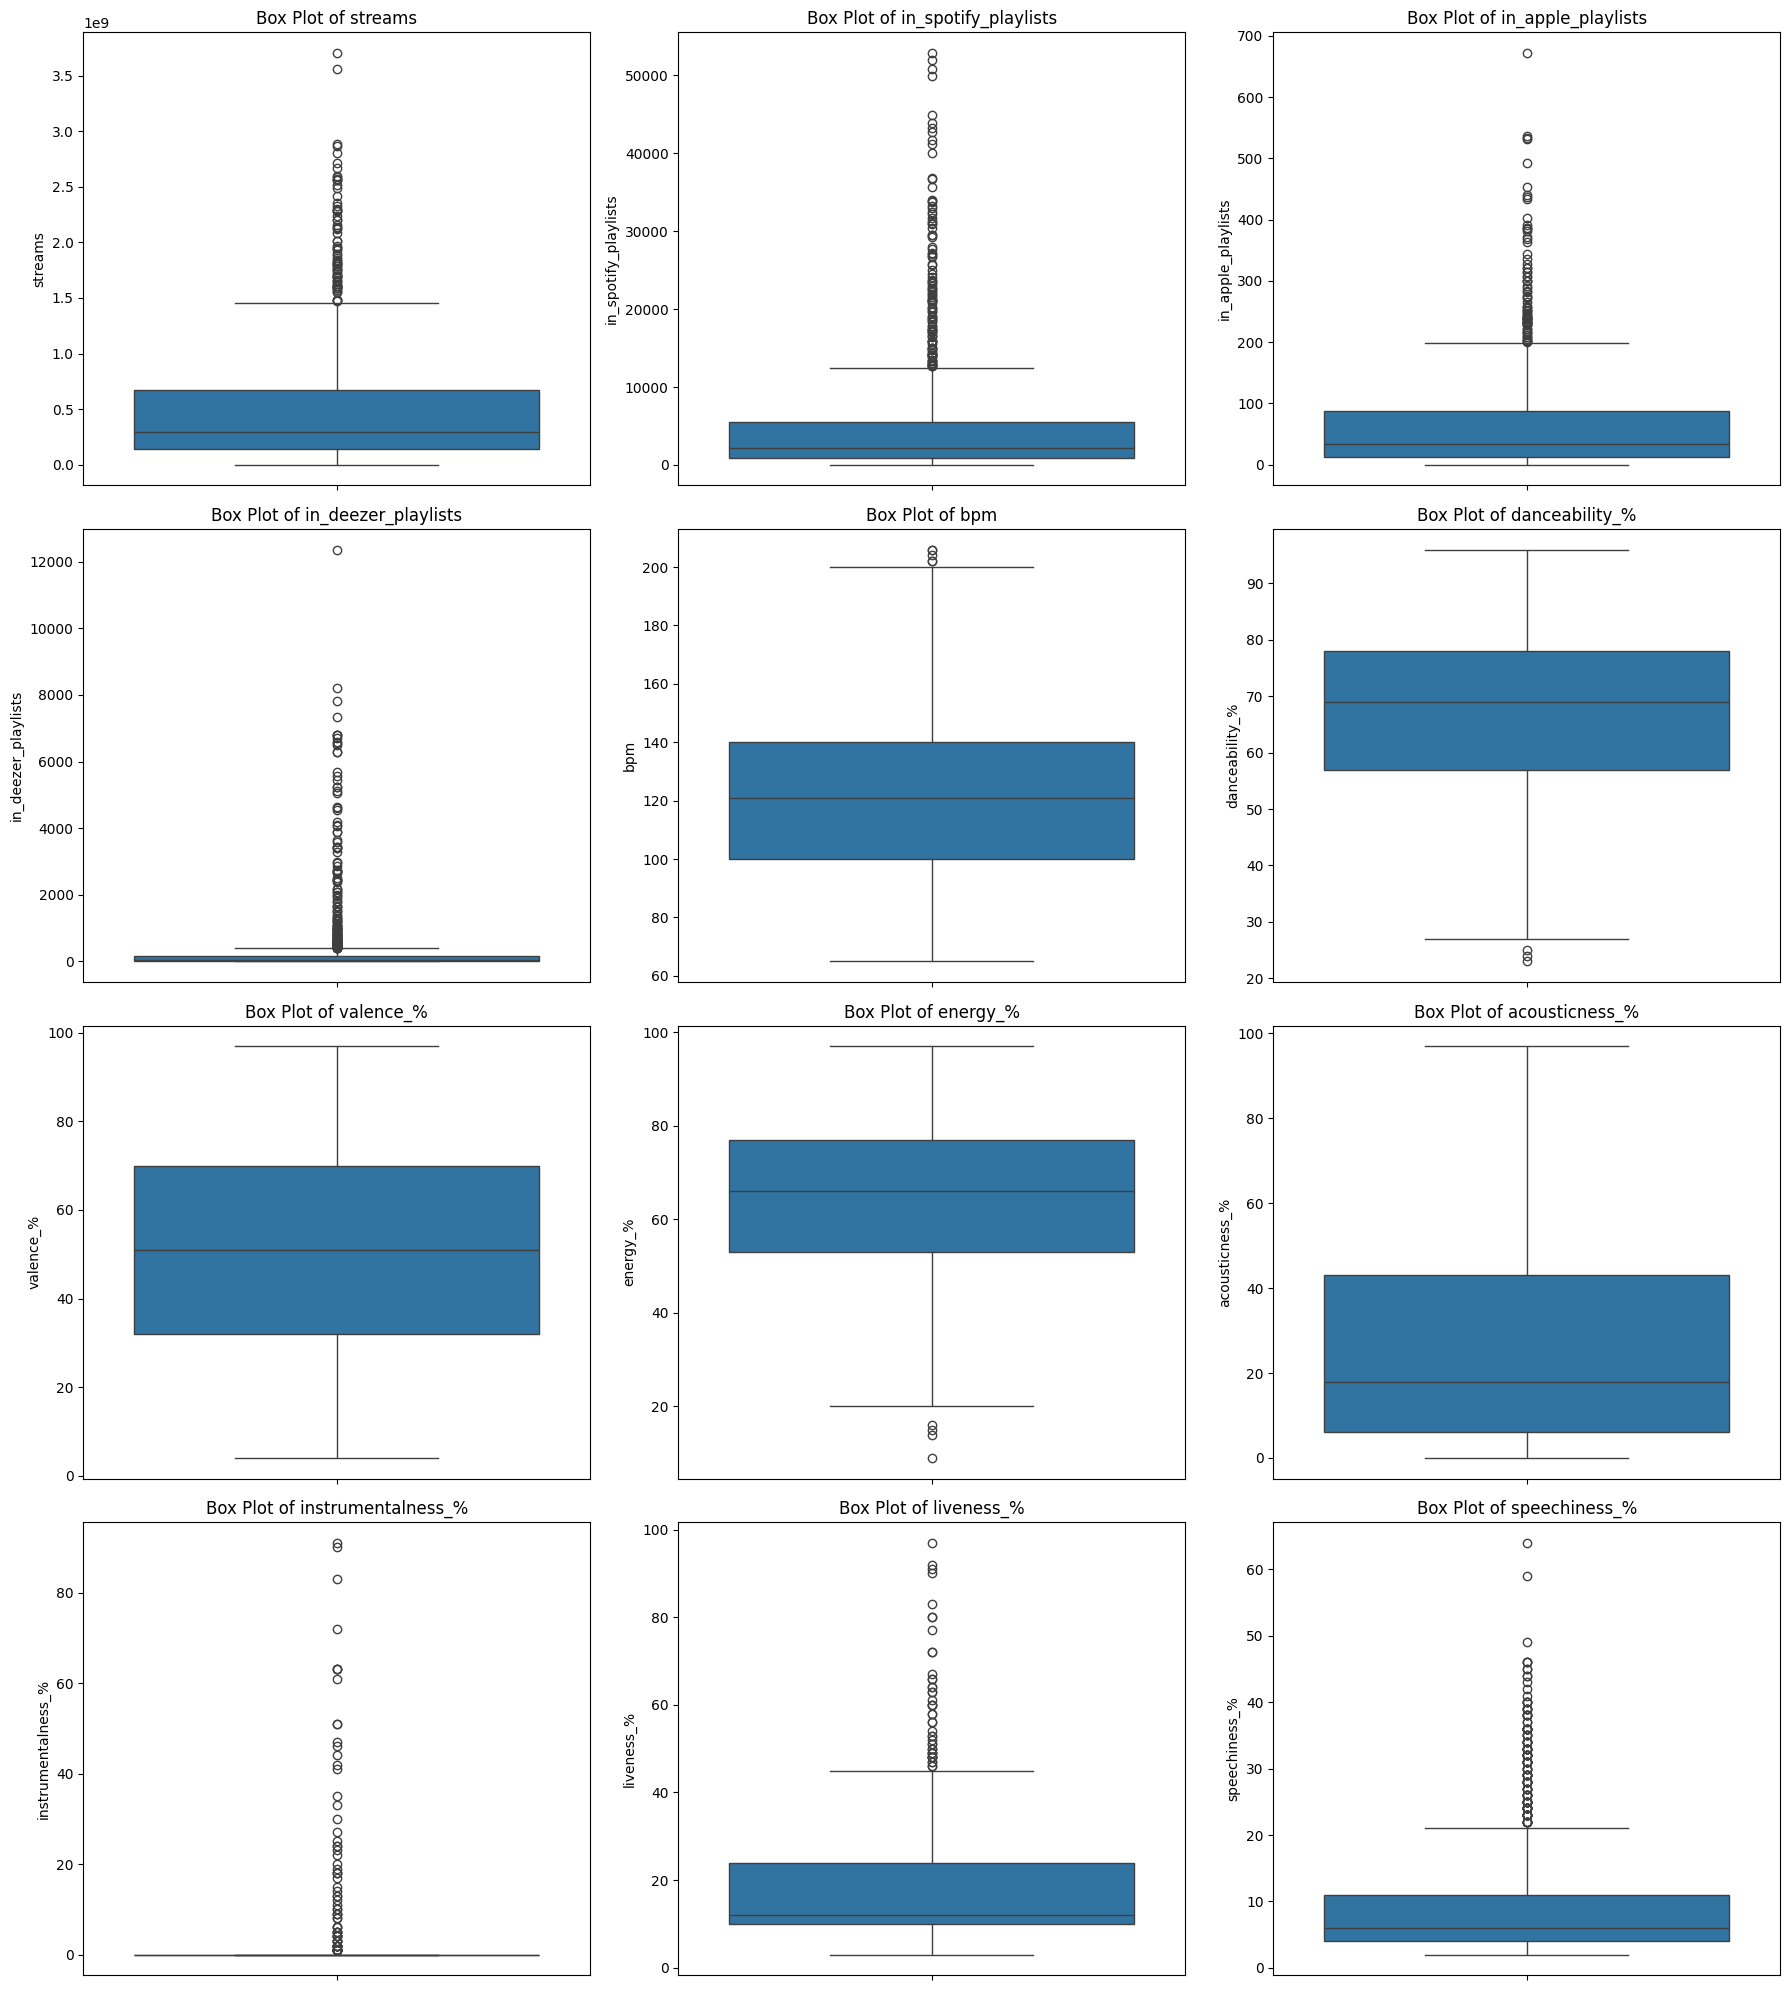


Descriptive statistics for selected numerical columns:


,streams,in_spotify_playlists,in_apple_playlists,in_deezer_playlists,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,9.530000e+02,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,5.135979e+08,5200.124869,67.812172,385.187828,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,5.668039e+08,7897.608990,86.441493,1130.535561,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,0.000000e+00,31.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.413817e+08,875.000000,13.000000,13.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,2.902286e+08,2224.000000,34.000000,44.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,6.738011e+08,5542.000000,88.000000,164.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,3.703895e+09,52898.000000,672.000000,12367.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [16]:
numerical_cols_for_outliers = [
    'streams',
    'in_spotify_playlists',
    'in_apple_playlists',
    'in_deezer_playlists',
    'bpm',
    'danceability_%',
    'valence_%',
    'energy_%',
    'acousticness_%',
    'instrumentalness_%',
    'liveness_%',
    'speechiness_%'
]

print("Generating box plots for numerical columns to identify outliers...")

# Determine the number of rows and columns for subplots
num_cols = len(numerical_cols_for_outliers)
num_rows = (num_cols + 2) // 3 # Roughly 3 plots per row

plt.figure(figsize=(18, num_rows * 5))

for i, col in enumerate(numerical_cols_for_outliers):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

print("\nDescriptive statistics for selected numerical columns:")
display(df[numerical_cols_for_outliers].describe())

## Identify and Handle Outliers

### Subtask:
Handle identified outliers in numerical columns by capping values at the 1st and 99th percentiles.


**Reasoning**:
To handle outliers as instructed, I will define the list of columns to cap, iterate through them, calculate the 1st and 99th percentiles, and then cap the values in each column.



In [17]:
columns_to_cap = [
    'streams',
    'in_spotify_playlists',
    'in_apple_playlists',
    'in_deezer_playlists',
    'bpm',
    'danceability_%',
    'valence_%',
    'energy_%',
    'acousticness_%',
    'instrumentalness_%',
    'liveness_%',
    'speechiness_%'
]

print("Capping outliers at 1st and 99th percentiles for selected numerical columns...")

for col in columns_to_cap:
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    print(f"Column '{col}' capped between {lower_bound:.2f} and {upper_bound:.2f}")

print("Outlier capping complete.")

Capping outliers at 1st and 99th percentiles for selected numerical columns...
Column 'streams' capped between 29968332.72 and 2562409371.12
Column 'in_spotify_playlists' capped between 118.00 and 40649.12
Column 'in_apple_playlists' capped between 0.00 and 396.76
Column 'in_deezer_playlists' capped between 0.00 and 6528.64
Column 'bpm' capped between 73.52 and 188.48
Column 'danceability_%' capped between 31.00 and 93.00
Column 'valence_%' capped between 6.52 and 96.00
Column 'energy_%' capped between 24.00 and 94.00
Column 'acousticness_%' capped between 0.00 and 92.00
Column 'instrumentalness_%' capped between 0.00 and 48.92
Column 'liveness_%' capped between 5.00 and 69.40
Column 'speechiness_%' capped between 3.00 and 43.48
Outlier capping complete.


/tmp/ipython-input-1174971818.py:21: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


**Reasoning**:
After capping the outliers, I will generate and display new box plots for the `columns_to_cap` to visually assess the effect of outlier treatment and then display the descriptive statistics for these columns to show the quantitative changes, as per the instructions.



Generating new box plots after outlier capping...


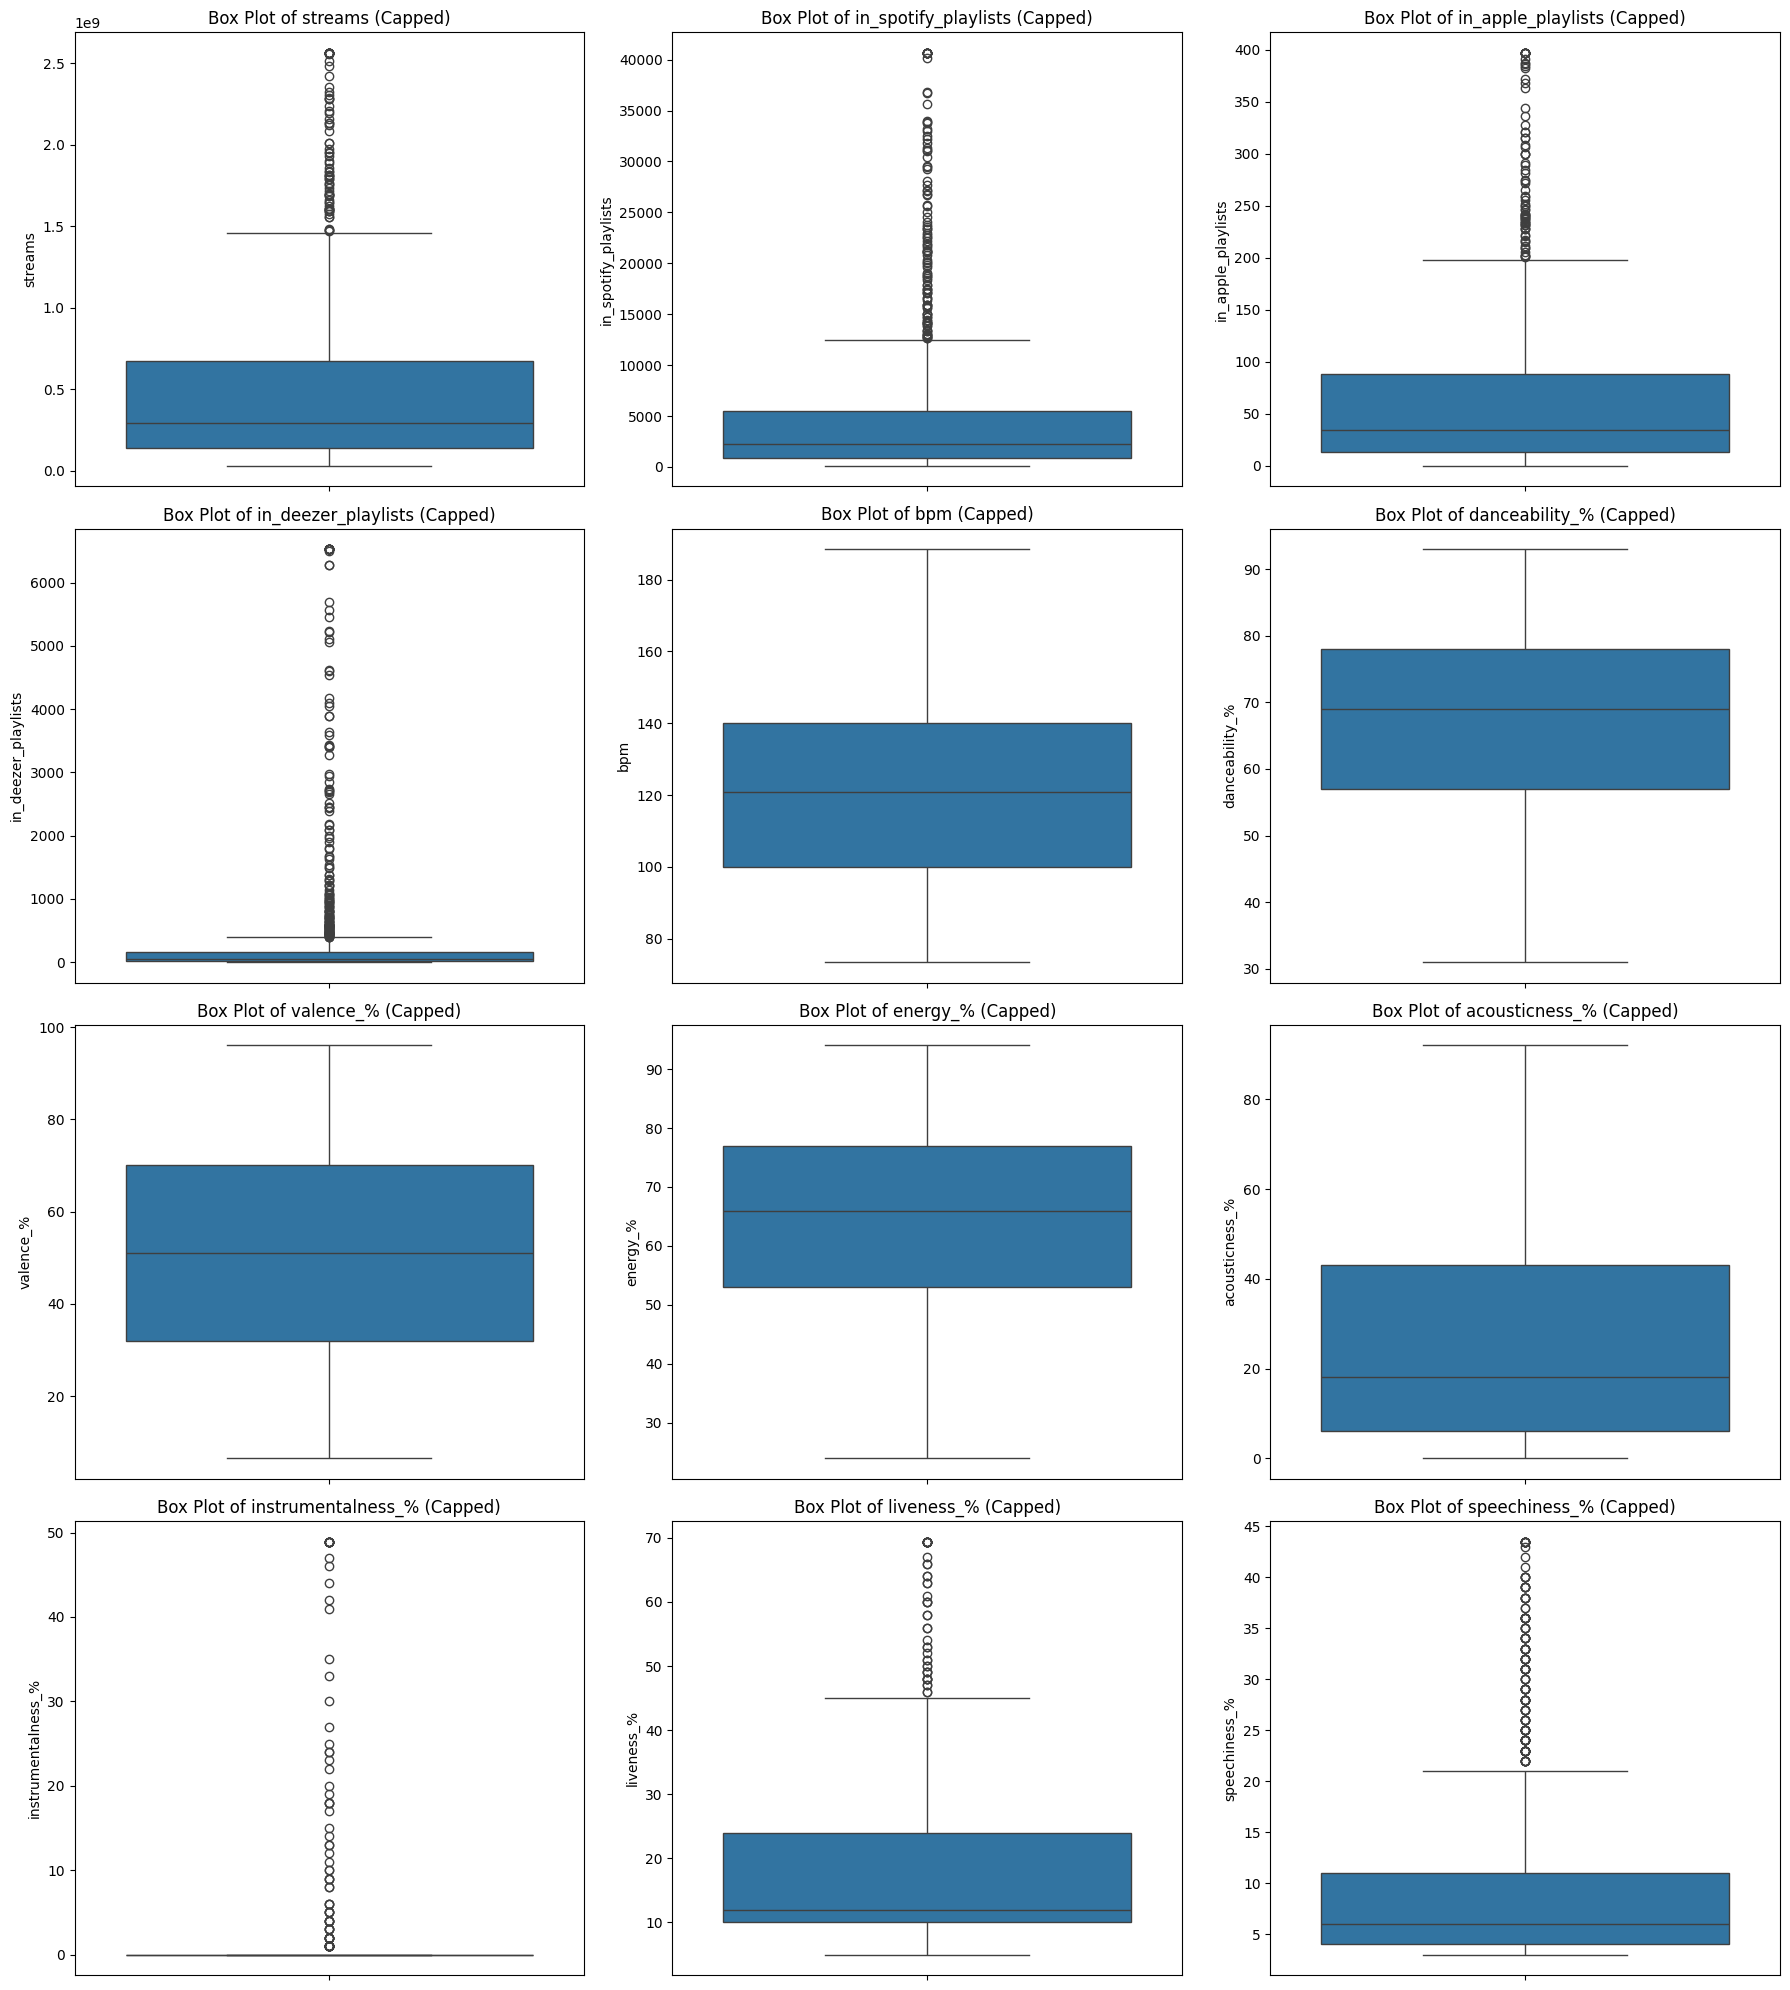


Descriptive statistics for selected numerical columns after capping:


,streams,in_spotify_playlists,in_apple_playlists,in_deezer_playlists,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,9.530000e+02,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,5.102761e+08,5140.653935,66.800210,373.909129,122.462749,66.987408,51.444071,64.329486,27.033578,1.372718,18.079748,10.078489
std,5.513722e+08,7587.575896,81.533803,1047.717904,27.684407,14.507020,23.435115,16.359940,25.933920,6.686629,13.029360,9.681657
min,2.996833e+07,118.000000,0.000000,0.000000,73.520000,31.000000,6.520000,24.000000,0.000000,0.000000,5.000000,3.000000
25%,1.413817e+08,875.000000,13.000000,13.000000,100.000000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,2.902286e+08,2224.000000,34.000000,44.000000,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,6.738011e+08,5542.000000,88.000000,164.000000,140.000000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,2.562409e+09,40649.120000,396.760000,6528.640000,188.480000,93.000000,96.000000,94.000000,92.000000,48.920000,69.400000,43.480000


In [18]:
print("Generating new box plots after outlier capping...")

# Determine the number of rows and columns for subplots
num_cols = len(columns_to_cap)
num_rows = (num_cols + 2) // 3 # Roughly 3 plots per row

plt.figure(figsize=(18, num_rows * 5))

for i, col in enumerate(columns_to_cap):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col} (Capped)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

print("\nDescriptive statistics for selected numerical columns after capping:")
display(df[columns_to_cap].describe())

## Perform Feature Engineering

### Subtask:
Create new features from existing ones, including a combined 'release_date', 'decade' from 'released_year', and a 'popularity_score' from 'streams' and 'in_spotify_playlists'.


**Reasoning**:
The first instruction is to create a combined 'release_date' column from 'released_year', 'released_month', and 'released_day'. This can be achieved by using `pd.to_datetime` with these columns, and `errors='coerce'` to handle any invalid date combinations gracefully, resulting in NaT (Not a Time) for invalid dates. We will then fill any resulting NaTs with a default date to ensure no missing values for date operations.



In [19]:
print("Creating 'release_date' column...")
# Combine year, month, day into a single date string and convert to datetime
df['release_date'] = pd.to_datetime(df[['released_year', 'released_month', 'released_day']].astype(str).agg('-'.join, axis=1), errors='coerce')

# Fill any NaT values (invalid dates) with a default date, e.g., the median date or a specific date like 2000-01-01
# For this task, we will fill with 2000-01-01 as a neutral placeholder.
df['release_date'].fillna(pd.to_datetime('2000-01-01'), inplace=True)

print("Verifying 'release_date' column...")
display(df[['released_year', 'released_month', 'released_day', 'release_date']].head())

Creating 'release_date' column...
Verifying 'release_date' column...


/tmp/ipython-input-1118025023.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['release_date'].fillna(pd.to_datetime('2000-01-01'), inplace=True)


,released_year,released_month,released_day,release_date
0,2023,7,14,2023-07-14
1,2023,3,23,2023-03-23
2,2023,6,30,2023-06-30
3,2019,8,23,2019-08-23
4,2023,5,18,2023-05-18


**Reasoning**:
The previous code generated a `FutureWarning` because `inplace=True` was used with `fillna` on a chained assignment. To address this and prevent potential issues in future pandas versions, I will modify the code to reassign the result of `fillna` directly to the 'release_date' column. Following this, I will create a new 'decade' column by extracting the decade from the 'released_year' column using floor division.



In [20]:
print("Creating 'release_date' column...")
# Combine year, month, day into a single date string and convert to datetime
df['release_date'] = pd.to_datetime(df[['released_year', 'released_month', 'released_day']].astype(str).agg('-'.join, axis=1), errors='coerce')

# Fill any NaT values (invalid dates) with a default date, e.g., the median date or a specific date like 2000-01-01
# For this task, we will fill with 2000-01-01 as a neutral placeholder.
df['release_date'] = df['release_date'].fillna(pd.to_datetime('2000-01-01'))

print("Verifying 'release_date' column...")
display(df[['released_year', 'released_month', 'released_day', 'release_date']].head())

print("Creating 'decade' column...")
df['decade'] = (df['released_year'] // 10 * 10).astype(str) + 's'

print("Verifying 'decade' column...")
display(df[['released_year', 'decade']].head())

Creating 'release_date' column...
Verifying 'release_date' column...


,released_year,released_month,released_day,release_date
0,2023,7,14,2023-07-14
1,2023,3,23,2023-03-23
2,2023,6,30,2023-06-30
3,2019,8,23,2019-08-23
4,2023,5,18,2023-05-18


Creating 'decade' column...
Verifying 'decade' column...


,released_year,decade
0,2023,2020s
1,2023,2020s
2,2023,2020s
3,2019,2010s
4,2023,2020s


**Reasoning**:
The next instruction is to create a new column named 'popularity_score' by combining 'streams' and 'in_spotify_playlists'. A common approach is to normalize these features and then combine them, for instance, using a weighted sum. After creating the 'popularity_score' column, I will display the first few rows of the DataFrame, including all newly created columns, to verify the changes and confirm the subtask's completion.



In [21]:
print("Creating 'popularity_score' column...")
# Normalize 'streams' and 'in_spotify_playlists' before combining to give them comparable scales
# Using min-max normalization as a simple example
df['streams_normalized'] = (df['streams'] - df['streams'].min()) / (df['streams'].max() - df['streams'].min())
df['in_spotify_playlists_normalized'] = (df['in_spotify_playlists'] - df['in_spotify_playlists'].min()) / (df['in_spotify_playlists'].max() - df['in_spotify_playlists'].min())

# Create 'popularity_score' using a weighted sum (adjust weights as needed)
df['popularity_score'] = (df['streams_normalized'] * 0.6) + (df['in_spotify_playlists_normalized'] * 0.4)

print("Verifying new features and first few rows of the DataFrame:")
display(df[['track_name', 'artist(s)_name', 'streams', 'in_spotify_playlists', 'release_date', 'decade', 'popularity_score']].head())

Creating 'popularity_score' column...
Verifying new features and first few rows of the DataFrame:


,track_name,artist(s)_name,streams,in_spotify_playlists,release_date,decade,popularity_score
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",141381703.0,553.0,2023-07-14,2020s,0.030690
1,LALA,Myke Towers,133716286.0,1474.0,2023-03-23,2020s,0.037963
2,vampire,Olivia Rodrigo,140003974.0,1397.0,2023-06-30,2020s,0.038693
3,Cruel Summer,Taylor Swift,800840817.0,7858.0,2019-08-23,2010s,0.259025
4,WHERE SHE GOES,Bad Bunny,303236322.0,3133.0,2023-05-18,2020s,0.094499


## Summarize Cleaning and Engineering Steps

### Subtask:
Provide a summary of the data cleaning and feature engineering steps performed, including any changes made to the DataFrame and a brief overview of the resulting dataset's state.


Here's a summary of the data cleaning and feature engineering steps performed on the DataFrame:

### Data Cleaning Steps:

1.  **Missing Values Imputation**: Missing values in the 'key' column were filled with the mode of the column. Similarly, missing values in the 'in_shazam_charts' column were also filled with its mode.
2.  **Data Type Correction**: The columns 'streams', 'in_deezer_playlists', and 'in_shazam_charts' were identified as having incorrect data types (object) due to non-numeric characters. These columns were cleaned by removing commas and then converted to a numerical (integer) data type. Any values that could not be converted were coerced to NaN and then filled with 0.
3.  **Outlier Handling**: Outliers in several numerical columns, including 'streams', 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', and 'speechiness_%', were handled by capping them at the 1st and 99th percentiles. This ensures that extreme values do not disproportionately influence subsequent analyses.

### Feature Engineering Steps:

1.  **'release_date'**: A new datetime column, 'release_date', was created by combining 'released_year', 'released_month', and 'released_day'. Invalid date combinations were filled with a default date of '2000-01-01'.
2.  **'decade'**: A 'decade' column was created from the 'released_year' to categorize songs by their release decade (e.g., '2000s', '2010s').
3.  **'popularity_score'**: A 'popularity_score' was engineered by normalizing and combining 'streams' and 'in_spotify_playlists'. These two features were normalized using min-max scaling and then combined using a weighted sum (60% streams, 40% in_spotify_playlists) to provide a composite measure of song popularity.

**Reasoning**:
Now, I will display the first few rows of the DataFrame, print its information, and show descriptive statistics to provide a comprehensive overview of the dataset's current state after all cleaning and feature engineering, fulfilling the remaining instructions.



In [22]:
print("\nFirst few rows of the DataFrame with new features and cleaned data:")
display(df.head())

print("\nDataFrame Info after all operations:")
df.info()

print("\nDescriptive statistics of numerical columns after all operations:")
display(df.describe())


First few rows of the DataFrame with new features and cleaned data:


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date,decade,streams_normalized,in_spotify_playlists_normalized,popularity_score
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553.0,147,141381703.0,43.0,...,83,31,0.00,8.0,4.0,2023-07-14,2020s,0.043994,0.010732,0.030690
1,LALA,Myke Towers,1,2023,3,23,1474.0,48,133716286.0,48.0,...,74,7,0.00,10.0,4.0,2023-03-23,2020s,0.040968,0.033456,0.037963
2,vampire,Olivia Rodrigo,1,2023,6,30,1397.0,113,140003974.0,94.0,...,53,17,0.00,31.0,6.0,2023-06-30,2020s,0.043450,0.031556,0.038693
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858.0,100,800840817.0,116.0,...,72,11,0.00,11.0,15.0,2019-08-23,2010s,0.304399,0.190964,0.259025
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133.0,50,303236322.0,84.0,...,80,14,48.92,11.0,6.0,2023-05-18,2020s,0.107907,0.074387,0.094499



DataFrame Info after all operations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   track_name                       953 non-null    object        
 1   artist(s)_name                   953 non-null    object        
 2   artist_count                     953 non-null    int64         
 3   released_year                    953 non-null    int64         
 4   released_month                   953 non-null    int64         
 5   released_day                     953 non-null    int64         
 6   in_spotify_playlists             953 non-null    float64       
 7   in_spotify_charts                953 non-null    int64         
 8   streams                          953 non-null    float64       
 9   in_apple_playlists               953 non-null    float64       
 10  in_apple_charts         

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date,streams_normalized,in_spotify_playlists_normalized,popularity_score
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.530000e+02,953.000000,953.000000,953.000000,...,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5140.653935,12.009444,5.102761e+08,66.800210,51.908709,373.909129,...,51.444071,64.329486,27.033578,1.372718,18.079748,10.078489,2018-09-10 05:09:45.519412480,0.189662,0.123921,0.163366
min,1.000000,1930.000000,1.000000,1.000000,118.000000,0.000000,2.996833e+07,0.000000,0.000000,0.000000,...,6.520000,24.000000,0.000000,0.000000,5.000000,3.000000,1930-01-01 00:00:00,0.000000,0.000000,0.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.413817e+08,13.000000,7.000000,13.000000,...,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000,2020-06-28 00:00:00,0.043994,0.018677,0.036706
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.902286e+08,34.000000,38.000000,44.000000,...,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000,2022-04-08 00:00:00,0.102771,0.051960,0.081111
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738011e+08,88.000000,87.000000,164.000000,...,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000,2022-11-04 00:00:00,0.254234,0.133823,0.206871
max,8.000000,2023.000000,12.000000,31.000000,40649.120000,147.000000,2.562409e+09,396.760000,275.000000,6528.640000,...,96.000000,94.000000,92.000000,48.920000,69.400000,43.480000,2023-07-14 00:00:00,1.000000,1.000000,1.000000
std,0.893044,11.116218,3.566435,9.201949,7587.575896,19.575992,5.513722e+08,81.533803,50.630241,1047.717904,...,23.435115,16.359940,25.933920,6.686629,13.029360,9.681657,NaN,0.217724,0.187204,0.196003


## Final Task

### Subtask:
Conclude the data cleaning and feature engineering process, ensuring the DataFrame is ready for subsequent analysis or modeling.


## Summary:

### Data Analysis Key Findings
*   **Missing Values Handled**: The `in_shazam_charts` column (5.25% missing) was imputed with its mode '0', and the `key` column (9.97% missing) was imputed with its mode 'C#'. All columns now have no missing values.
*   **Data Type Conversions**: The columns `streams`, `in_deezer_playlists`, and `in_shazam_charts` were successfully converted from `object` to `int64` after removing non-numeric characters (commas) and filling any resulting `NaN` values with 0.
*   **Outlier Management**: Outliers in 12 numerical columns, including `streams`, `in_spotify_playlists`, and `bpm`, were handled by capping values at the 1st and 99th percentiles. For instance, `streams` were capped between approximately 29.97 million and 2.56 billion.
*   **New Feature: `release_date`**: A new `datetime64[ns]` column named `release_date` was created by combining `released_year`, `released_month`, and `released_day`. Invalid date entries were filled with '2000-01-01'.
*   **New Feature: `decade`**: A categorical `decade` column (e.g., '2020s') was generated from the `released_year`.
*   **New Feature: `popularity_score`**: A `popularity_score` (float64) was engineered by normalizing `streams` and `in_spotify_playlists` using min-max scaling and then combining them with a weighted sum (60% `streams_normalized` and 40% `in_spotify_playlists_normalized`).

### Insights or Next Steps
*   The dataset is now cleaned, standardized, and enriched with new features, making it suitable for various analytical tasks such as trend analysis over decades or popularity prediction modeling.
*   Further analysis could involve exploring correlations between the `popularity_score` and various audio features (e.g., `danceability_%`, `energy_%`) to identify factors contributing to song popularity.


# Task
Create a binary target variable `is_popular` from the `popularity_score` column in the `df` DataFrame, marking songs with a `popularity_score` above the 75th percentile as 'popular' (1) and the rest as 'not popular' (0). Then, select suitable numerical features for a Naive Bayes model and split the data into training and testing sets. Finally, train a Gaussian Naive Bayes classifier on the training data, evaluate its performance using metrics like accuracy, precision, recall, and F1-score, and present a confusion matrix to summarize the classification results.

## Create Target Variable

### Subtask:
Define a binary target variable `is_popular` from the 'popularity_score'. For example, songs with a `popularity_score` above the 75th percentile can be marked as 'popular', and the rest as 'not popular'.


**Reasoning**:
The first instruction is to calculate the 75th percentile of the 'popularity_score' column. This will establish the threshold for defining a 'popular' song.



In [23]:
print("Calculating the 75th percentile for 'popularity_score'...")
popularity_threshold = df['popularity_score'].quantile(0.75)
print(f"75th percentile of popularity_score: {popularity_threshold:.4f}")

Calculating the 75th percentile for 'popularity_score'...
75th percentile of popularity_score: 0.2069


**Reasoning**:
Following the instructions, I will now create the 'is_popular' column by comparing the 'popularity_score' against the calculated 'popularity_threshold', assigning 1 for popular and 0 for not popular, and then display the first few rows to verify the new column.



In [24]:
print("Creating 'is_popular' target variable...")
df['is_popular'] = (df['popularity_score'] > popularity_threshold).astype(int)

print("Verifying 'is_popular' column and its distribution:")
display(df[['popularity_score', 'is_popular']].head())
print("Value counts for 'is_popular':")
print(df['is_popular'].value_counts())

Creating 'is_popular' target variable...
Verifying 'is_popular' column and its distribution:


,popularity_score,is_popular
0,0.030690,0
1,0.037963,0
2,0.038693,0
3,0.259025,1
4,0.094499,0


Value counts for 'is_popular':
is_popular
0    715
1    238
Name: count, dtype: int64


## Prepare Features for Naive Bayes

### Subtask:
Select numerical features from the DataFrame that will be used as input for the Naive Bayes model. Ensure all features are in a suitable format (e.g., numerical).


**Reasoning**:
I will define a list of numerical features, create a DataFrame `X` using these features, create a Series `y` for the target variable 'is_popular', and then print their shapes to confirm the data preparation for the Naive Bayes model.



In [25]:
print("Selecting numerical features for Naive Bayes model...")

# Define the list of numerical features to be used as input
features = [
    'streams',
    'in_spotify_playlists',
    'in_apple_playlists',
    'in_deezer_playlists',
    'bpm',
    'danceability_%',
    'valence_%',
    'energy_%',
    'acousticness_%',
    'instrumentalness_%',
    'liveness_%',
    'speechiness_%'
]

# Create the feature matrix X
X = df[features]

# Create the target variable y
y = df['is_popular']

print("Features (X) and target (y) prepared.")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Selecting numerical features for Naive Bayes model...
Features (X) and target (y) prepared.
Shape of X: (953, 12)
Shape of y: (953,)


## Split Data into Training and Testing Sets

### Subtask:
Divide the preprocessed dataset into training and testing sets to evaluate the model's performance on unseen data. A standard split, such as 70% for training and 30% for testing, will be used.


**Reasoning**:
To divide the dataset into training and testing sets, I need to import the `train_test_split` function from `sklearn.model_selection` and then apply it to the `X` (features) and `y` (target) data.



In [26]:
print("Splitting data into training and testing sets...")
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data split complete.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Splitting data into training and testing sets...
Data split complete.
Shape of X_train: (667, 12)
Shape of X_test: (286, 12)
Shape of y_train: (667,)
Shape of y_test: (286,)


## Train Gaussian Naive Bayes Model

### Subtask:
Initialize and train a `GaussianNB` classifier (suitable for continuous features) using the training data.


**Reasoning**:
To initialize and train a Gaussian Naive Bayes classifier, I will import `GaussianNB` from `sklearn.naive_bayes`, instantiate the model, and then fit it using the `X_train` and `y_train` datasets.



In [27]:
print("Initializing and training Gaussian Naive Bayes model...")
from sklearn.naive_bayes import GaussianNB

# Instantiate the Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Train the model using the training data
gnb_model.fit(X_train, y_train)

print("Gaussian Naive Bayes model trained successfully.")

Initializing and training Gaussian Naive Bayes model...
Gaussian Naive Bayes model trained successfully.


## Evaluate Model Performance

### Subtask:
Evaluate the trained Gaussian Naive Bayes classifier's performance using metrics such as accuracy, precision, recall, and F1-score, and visualize the confusion matrix to summarize the classification results.

**Reasoning**:
To evaluate the trained model, I will first make predictions on the test set using the trained `gnb_model` and then calculate and print the classification report, which includes accuracy, precision, recall, and F1-score.



In [28]:
print("Making predictions on the test set...")
y_pred = gnb_model.predict(X_test)

print("Calculating classification metrics...")
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Making predictions on the test set...
Calculating classification metrics...

Accuracy: 0.9790
Precision: 0.9538
Recall: 0.9538
F1-Score: 0.9538

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       221
           1       0.95      0.95      0.95        65

    accuracy                           0.98       286
   macro avg       0.97      0.97      0.97       286
weighted avg       0.98      0.98      0.98       286



**Reasoning**:
To complete the evaluation, I will visualize the confusion matrix to summarize the classification results. This involves importing `ConfusionMatrixDisplay` from `sklearn.metrics`, creating the display, and then showing it using `matplotlib.pyplot`.



Visualizing the Confusion Matrix...


<Figure size 800x600 with 0 Axes>

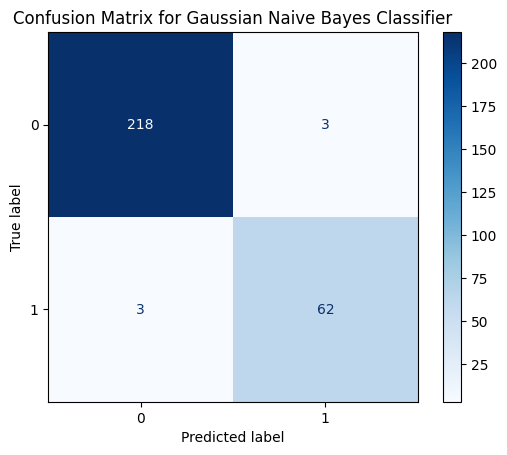

Confusion Matrix displayed.


In [29]:
print("Visualizing the Confusion Matrix...")
from sklearn.metrics import ConfusionMatrixDisplay

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(gnb_model, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Gaussian Naive Bayes Classifier')
plt.grid(False)
plt.show()

print("Confusion Matrix displayed.")

## Final Task

### Subtask:
Summarize the results of the Naive Bayes classification, including key performance metrics and any insights gained from the model.


## Summary:

### Q&A
The Naive Bayes classification model achieved high performance metrics: an accuracy of 0.9790, precision of 0.9538, recall of 0.9538, and an F1-score of 0.9538. These metrics suggest that the model is very effective at classifying songs as 'popular' or 'not popular' based on the selected features. The confusion matrix visually confirmed these strong results, showing a low number of misclassifications.

### Data Analysis Key Findings
*   The 75th percentile for `popularity_score` was determined to be 0.2069.
*   A binary target variable, `is_popular`, was created, classifying songs with `popularity_score` above 0.2069 as 'popular' (1) and the rest as 'not popular' (0). This resulted in 238 popular songs and 715 not popular songs in the dataset.
*   Twelve numerical features, including 'streams', 'in\_spotify\_playlists', 'bpm', and various audio features like 'danceability\_%', were selected for the Naive Bayes model.
*   The dataset was split into training (667 samples) and testing (286 samples) sets, with the testing set comprising 30% of the total data.
*   A Gaussian Naive Bayes classifier was trained and evaluated, yielding an accuracy of 0.9790, a precision of 0.9538, a recall of 0.9538, and an F1-score of 0.9538 on the test set.

### Insights or Next Steps
*   The Gaussian Naive Bayes model demonstrated excellent performance in classifying song popularity, suggesting that the selected features are strong indicators of a song's popularity status. This model could be a valuable tool for automatically categorizing songs.
*   Further analysis could involve exploring feature importance to understand which specific attributes contribute most significantly to a song's popularity, potentially leading to actionable insights for music producers or marketers.
